# Classification in Data Science 

## LEC NO. 45) Decision Tree:

###### Now we will implement the Decision tree using Python. We’ll predict whether a person has diabetes or not, based on information about the patient such as blood pressure, body mass index (BMI), age, etc.

### STEP-1) Importing Required Libraries
Let's first load the required libraries.

1) Import Pandas for DataFrames

2) Import Decision Tree Classifier

3) Import train_test_split function

4) Import scikit-learn metrics module for accuracy calculation


In [57]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

### STEP-2) Loading Data
Let's first load the required Pima Indian Diabetes
dataset using pandas' read CSV function.

In [58]:
df = pd.read_csv(r'F:\DataScience\diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### STEP-3) Feature Selection
Here, you need to divide given columns into two
types of variables dependent(or target variable)
and independent variable(or feature variables).

In [59]:
# Feature variables
X = df[['Pregnancies', 'Insulin', 'BMI','Age','Glucose','BloodPressure','DiabetesPedigreeFunction']]
# Target variable
y = df['Outcome']

In [60]:
X

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
0,6,0,33.6,50,148,72,0.627
1,1,0,26.6,31,85,66,0.351
2,8,0,23.3,32,183,64,0.672
3,1,94,28.1,21,89,66,0.167
4,0,168,43.1,33,137,40,2.288
...,...,...,...,...,...,...,...
763,10,180,32.9,63,101,76,0.171
764,2,0,36.8,27,122,70,0.340
765,5,112,26.2,30,121,72,0.245
766,1,0,30.1,47,126,60,0.349


In [61]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### STEP-4) Splitting Data
To understand model performance, dividing the
dataset into a training set and a test set is a good
strategy.

Let's split the dataset by using function
train_test_split(). You need to pass 4 parameters
features, target, test_set size, and random_sate (for randomly selection of rows).

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
762,9,0,22.5,33,89,62,0.142
127,1,94,33.3,23,118,58,0.261
564,0,0,32.4,27,91,80,0.601
375,12,325,39.2,58,140,82,0.528
663,9,130,37.9,40,145,80,0.637
...,...,...,...,...,...,...,...
763,10,180,32.9,63,101,76,0.171
192,7,0,30.4,36,159,66,0.383
629,4,0,24.7,21,94,65,0.148
559,11,0,30.1,35,85,74,0.300


In [27]:
print(y_train)

762    0
127    0
564    0
375    1
663    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 576, dtype: int64


In [28]:
X_test

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
661,1,0,42.9,22,199,76,1.394
122,2,100,33.6,23,107,74,0.404
113,4,0,34.0,25,76,62,0.391
14,5,175,25.8,51,166,72,0.587
529,0,0,24.6,31,111,65,0.660
...,...,...,...,...,...,...,...
366,6,0,27.6,29,124,72,0.368
301,2,135,31.6,25,144,58,0.422
382,1,182,25.4,21,109,60,0.947
140,3,0,21.1,55,128,78,0.268


### STEP-5) Building Decision Tree Model
Let's create a Decision Tree Model using Scikitlearn.

In [62]:
# Create Decision Tree classifer object
DT_model = DecisionTreeClassifier()

In [63]:
# Train Decision Tree Classifer, fit your model on train set using fit() Fn.
DT_model = DT_model.fit(X_train,y_train)

In [64]:
# Predict the response for test dataset
y_pred = DT_model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [65]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
366    1
301    1
382    0
140    0
463    0
Name: Outcome, Length: 192, dtype: int64

### STEP-6) Evaluating Model
Let's estimate, how accurately the classifier or
model can predict the type of cultivars.
Accuracy can be computed by comparing actual
test set values and predicted values.

In [66]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy of your DT_model :",metrics.accuracy_score(y_test,y_pred))

Accuracy of your DT_model : 0.7604166666666666


Well, you got a classification rate of almost 76.00%, considered as good accuracy.

###### More Predictions Examples (can be Out of sample)

In [71]:
pred1=DT_model.predict([[4,5,30.5,60,150,65,0.6]]) # argument has to be 2D array
print(pred1)

[1]


In [72]:
pred2=DT_model.predict([[4,5,30.5,40,150,65,0.6]]) # argument has to be 2D array
pred2

array([0], dtype=int64)

### STEP-7) Model Evaluation using Confusion Matrix
A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [73]:
# comparing the y_pred(predicted values) with y_test(actual values)
from sklearn import metrics
DT_matrix = metrics.confusion_matrix(y_test,y_pred)
print("Diagonal values's SUM will show total no. of correct predictions.")
DT_matrix

Diagonal values's SUM will show total no. of correct predictions.


array([[105,  25],
       [ 21,  41]], dtype=int64)

### STEP-8) Visualizing Confusion Matrix using Heatmap

Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Text(0.5, 15.0, 'Predicted label')

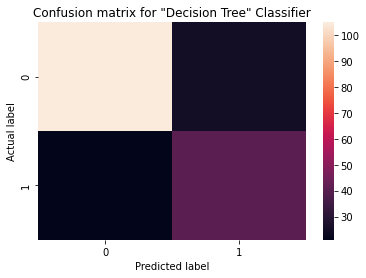

In [75]:
# The %matplotlib inline will make your plot outputs appear and be stored
# within the notebook.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
sb.heatmap(pd.DataFrame(DT_matrix))
plt.title('Confusion matrix for "Decision Tree" Classifier')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')